In [190]:
#There are two types of supervised machine learning algorithms: Regression and classification. 
#The former predicts continuous value outputs while the latter predicts discrete outputs.

In [191]:
#Linear Regression Theory

#Linear regression performs the task to predict a linear relationship
#between dependent variable value (y) based on a given independent variable (x). 
#Plotting the variables on axis gives us a straight line that best fits the data points.
#Mathematically it is represented by:

#Y = α + Xβ + ε
#where β is the intercept, α is the slope of the line, and ε is normally distributed.

In [192]:
# The dataset used for further analysis
# contains information on weather conditions recorded on each day at various weather stations around the world. 
# Download it from: https://www.kaggle.com/zaraavagyan/weathercsv (from Kaggle: an open source)

In [193]:
#import the required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline 
#(%matplotlib inline makes your plot outputs appear and be stored within the notebook.)

In [194]:
#Import the dataset using pandas
dataset = pd.read_csv('C:/Users/Dhruba/Desktop/GitHub/Python/Data/weather.csv')

In [195]:
# exploring the dataset a little
dataset.shape # number of rows and columns
dataset.describe() # to view summary statistics of the dataset
dataset.head() # the first five rows
dataset.tail() # the last five rows

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [196]:
# In this basic example,
# we will regress try to predict MaxTemp using MinTemp

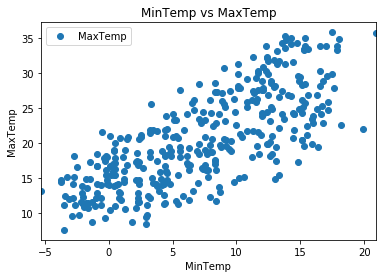

In [197]:
#Plotting MaxTemp vs MinTemp for a visual understanding
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

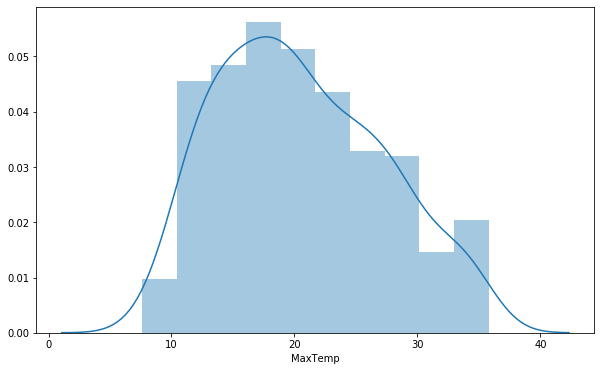

In [198]:
# Let us understand the data a little more.
# average max temperature was observed that the Average Maximum Temperature is Between Nearly 15 and 20.
plt.figure(figsize=(10,6))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])

In [199]:
# Our next step is to divide the data into “dependent” and “independent variables”.
# where independent variables are used to predict values for dependent variables.
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [200]:
# Training and Test Data Set
# Split 75% of the data to the training set while 25% of the data to test set using below code.
# This is done to check the prediction power of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [201]:
# Training the Algorithm 

import statsmodels.api as sm
X_train = sm.add_constant(X_train) 
# adding the constant

model = sm.OLS(y_train, X_train).fit()
model.summary()

# This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.84%.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     337.6
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           1.39e-49
Time:                        12:51:36   Log-Likelihood:                -798.80
No. Observations:                 274   AIC:                             1602.
Df Residuals:                     272   BIC:                             1609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.5650      0.427     34.110      0.000      13.724      15.406
x1             0.8364      0.046     18.374      0.000       0.747       0.926
==============================================================================
Omnibus:                       15.339   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.965
Skew:                          -0.138   Prob(JB):                       0.0307
Kurtosis:                       2.269   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
# Prediction and testing accuracy
X_test = sm.add_constant(X_test)
# adding the constant

y_pred <- model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) #The flatten() function is used to get a copy of an given array collapsed into one dimension.
df

,Actual,Predicted
0,25.2,23.597827
1,11.5,13.059516
2,21.1,27.528784
3,22.2,25.688762
4,20.4,27.194235
...,...,...
87,14.8,15.568637
88,9.7,12.641329
89,12.5,17.157748
90,14.2,17.659572


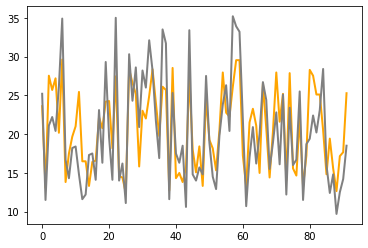

In [203]:
# Visualize Actual vs Fitted straight line
plt.plot(df.index, y_pred, color='orange', linewidth=2)
plt.plot(df.index, y_test, color='gray', linewidth=2)
plt.show()

In [135]:
# Though the prediction does not look very accurate,
# the relationship established through the Actuak vs Predicted looks more or less okay.

In [205]:
# Let us use Metrics to quantify our regression algorithms:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# Mean Squared Error (MSE) is the mean of the squared errors.
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

In [206]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Root Mean Squared Error: 4.204958398308425
Mean Squared Error: 17.681675131504555
Mean Absolute Error: 3.572093250152398


In [138]:
# RMSE is ~4.2 which is more than 20% of our mean of avg Max Temp (between 15 to 20), which means our algorithm is not good. 

In [207]:
# Let us try and fit a Multiple Linear Regression
# where the number of independent variables are more than 1

In [208]:
# MISSING VALUE TREATEMENT: filling out NAs using forward fills
dataset = dataset.fillna(method='ffill') 

In [209]:
# Defining Independent and Dependent variables again
X = dataset[['MinTemp', 'Evaporation', 'Sunshine']].values
y = dataset['MaxTemp'].values

In [210]:
# Training and Test Data Set
# Split 80% of the data to the training set while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [211]:
# Training our Model
# 2nd method of Linear Regression
# using from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [212]:
coeff_df = pd.DataFrame(regressor.coef_ ,index =['MinTemp', 'Evaporation', 'Sunshine'], columns = ['Coefficient'])
coeff_df 

,Coefficient
MinTemp,0.721650
Evaporation,0.369818
Sunshine,0.751983


In [213]:
# Prediction
# Actual vs Predicted

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,25.2,27.008015
1,11.5,10.125470
2,21.1,21.897418
3,22.2,21.436529
4,20.4,22.190588
...,...,...
69,18.9,17.283978
70,22.8,28.312264
71,16.1,18.524258
72,25.1,29.042352


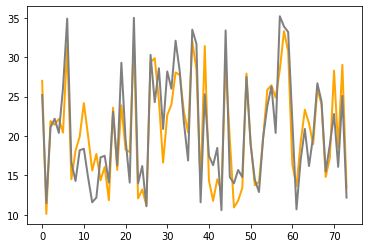

In [214]:
# Visualize Actual vs Fitted straight line
plt.plot(df.index, y_pred, color='orange', linewidth=2)
plt.plot(df.index, y_test, color='gray', linewidth=2)
plt.show()

In [215]:
# Let us use Metrics to quantify our regression algorithms:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# Mean Squared Error (MSE) is the mean of the squared errors.
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Root Mean Squared Error: 3.2691104151750943
Mean Squared Error: 10.687082906606276
Mean Absolute Error: 2.724828001717696


In [216]:
# RMSE has decreased to 3.27 from 4.2. :-D